In [1]:
import os
import sys
import numpy as np
import pandas as pd
os.listdir('/mnt/snap')
pd.options.display.max_columns = 2000

#### Function to create a list of dataframes to concatenate together later

In [2]:
def appendDataframe(dataframes,path):
    for f in os.listdir(path):
        with pd.HDFStore(os.path.join(path, f), 'r') as h:
            series = []
            for key in h.keys():
                series.append(h.get(key))
            newseries = pd.concat(series, axis=1)[['artist_mbid','artist_hotttnesss','duration','end_of_fade_in','key','key_confidence','loudness','mode','mode_confidence','song_id','start_of_fade_out','tempo','time_signature','time_signature_confidence','year']] #create a dataframe, drop the features that we think aren't important
            dataframes.append(newseries)


In [3]:
root = '/mnt/snap'
path = os.path.join(root,'data')
data = pd.DataFrame()
dataframes = []
checked = []
for r,d,f in os.walk(path):
    for file in f:
        #print(r)
        if r not in checked:
            print(os.path.join(root,r,file))
            appendDataframe(dataframes,os.path.join(root,r))
            checked.append(r)
        #tempdata = pd.read_hdf(os.path.join(root,r,file))
        #data = pd.concat(data, tempdata)
        #print (os.path.join(root,file))

/mnt/snap/data/C/C/C/TRCCCRP128F147BEFA.h5
/mnt/snap/data/C/C/Z/TRCCZKU128F429F6D9.h5
/mnt/snap/data/C/C/J/TRCCJXM128F422222E.h5
/mnt/snap/data/C/C/N/TRCCNUX12903D019DD.h5
/mnt/snap/data/C/C/M/TRCCMYC12903CCCDA2.h5
/mnt/snap/data/C/C/Q/TRCCQHB128F422174E.h5
/mnt/snap/data/C/C/L/TRCCLPY128F92FA57A.h5
/mnt/snap/data/C/C/I/TRCCIDS128F427E93C.h5
/mnt/snap/data/C/C/F/TRCCFDO128F428B925.h5
/mnt/snap/data/C/C/R/TRCCRCY128F93357A3.h5
/mnt/snap/data/C/C/G/TRCCGNG128F42614AD.h5
/mnt/snap/data/C/C/D/TRCCDBE128F427B76D.h5
/mnt/snap/data/C/C/K/TRCCKWM128F4254F20.h5
/mnt/snap/data/C/C/T/TRCCTJX128F92F80A9.h5
/mnt/snap/data/C/C/A/TRCCARW128F9337520.h5
/mnt/snap/data/C/C/E/TRCCEVV128F426B24B.h5
/mnt/snap/data/C/C/U/TRCCUUE128F42B0BA9.h5
/mnt/snap/data/C/C/O/TRCCOKK128F4281012.h5
/mnt/snap/data/C/C/B/TRCCBHM128F92F62E2.h5
/mnt/snap/data/C/C/S/TRCCSLQ128F426F12A.h5
/mnt/snap/data/C/C/W/TRCCWUJ128F422565F.h5
/mnt/snap/data/C/C/P/TRCCPYT128F424D8CF.h5
/mnt/snap/data/C/C/V/TRCCVJE128E078D061.h5
/mnt/snap/d

KeyboardInterrupt: 

In [ ]:
#pd.concat(lists)

## Sameer finished importing the data

### Data exploration

In [4]:
import pandas as pd

In [5]:
df = pd.read_hdf('/home/aimun/msd.h5', ignore_index = True)
df = pd.concat([df], ignore_index=True)

In [6]:
df.head()

,track_id,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_familiarity,artist_hotttnesss
0,TRDJCWJ128F92CDD98,547.00363,2.926,0,0.652,-9.395,1,0.704,538.604,117.292,4,0.809,0.899280,0.605604
1,TRDJCWA128F425C708,261.79873,0.000,9,0.442,-11.349,1,0.367,256.656,122.446,4,0.431,0.304566,0.000000
2,TRDJCZP12903CE7498,268.38159,0.000,1,0.625,-8.629,1,0.559,257.231,82.811,4,0.561,0.882112,0.670106
3,TRDJCUX128F425F866,236.14649,0.257,5,0.425,-14.287,1,0.469,212.764,139.583,4,0.228,0.492370,0.338942
4,TRDJCCR12903CAFA73,1517.60934,13.857,0,0.129,-17.578,0,0.228,1504.496,119.700,3,1.000,0.489777,0.346571


In [7]:
df.shape

(1000000, 14)

In [26]:
import seaborn as sns
%matplotlib inline

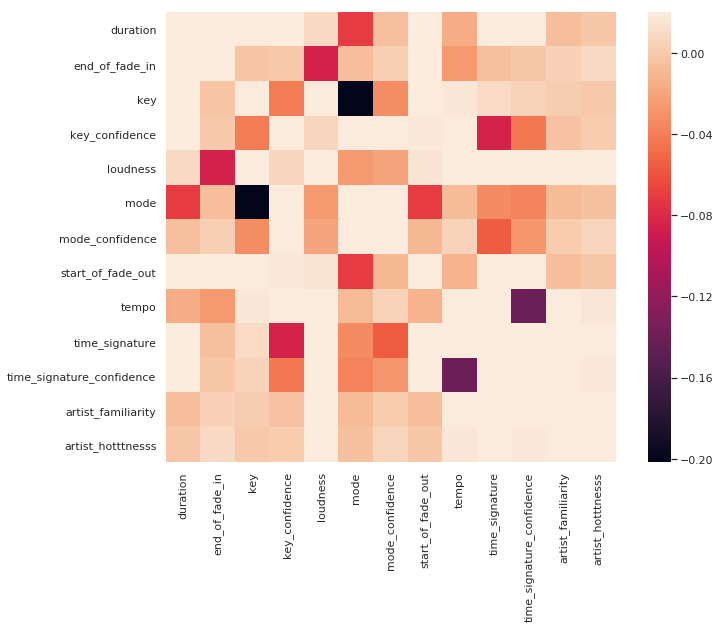

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Make the figure bigger

sns.heatmap(df.corr(), vmax=.02, square=True)

### Synthesize new dataset

#### Import genre

In [10]:
df_genre = pd.read_csv('msd-MAGD-genreAssignment.cls.txt', sep="\t", header=None)

In [11]:
df_genre = df_genre.rename(index=str, columns={0: "track_id", 1: "genre"})

In [12]:
df_genre.head()

,track_id,genre
0,TRAAAAK128F9318786,Pop_Rock
1,TRAAAAV128F421A322,Pop_Rock
2,TRAAAAW128F429D538,Rap
3,TRAAABD128F429CF47,Pop_Rock
4,TRAAACV128F423E09E,Pop_Rock


In [13]:
df_genre.shape

(422714, 2)

#### Import style

In [14]:
df_style = pd.read_csv('msd-MASD-styleAssignment.cls.txt', sep="\t", header=None)

In [15]:
df_style = df_style.rename(index=str, columns={0: "track_id", 1: "style"})

In [16]:
df_style.head()

,track_id,style
0,TRAAAAK128F9318786,Metal_Alternative
1,TRAAAAV128F421A322,Punk
2,TRAAAAW128F429D538,Hip_Hop_Rap
3,TRAAACV128F423E09E,Rock_Neo_Psychedelia
4,TRAAAEF128F4273421,Pop_Indie


In [17]:
df_style.shape

(273936, 2)

#### Merge into new dataframe

In [18]:
data = pd.merge(df, df_genre, on='track_id')
data = pd.merge(data, df_style, on='track_id')

In [19]:
data.head()

,track_id,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_familiarity,artist_hotttnesss,genre,style
0,TRDJCZP12903CE7498,268.38159,0.000,1,0.625,-8.629,1,0.559,257.231,82.811,4,0.561,0.882112,0.670106,Country,Country_Traditional
1,TRDJCUX128F425F866,236.14649,0.257,5,0.425,-14.287,1,0.469,212.764,139.583,4,0.228,0.492370,0.338942,New Age,Folk_International
2,TRDJCCR12903CAFA73,1517.60934,13.857,0,0.129,-17.578,0,0.228,1504.496,119.700,3,1.000,0.489777,0.346571,Electronic,Experimental
3,TRDJCNE128F428BE28,171.15383,0.229,7,0.632,-7.108,0,0.517,164.577,202.356,4,0.413,0.527130,0.344246,Pop_Rock,Punk
4,TRDJCET128F9312133,222.85016,0.409,2,0.838,-19.036,1,0.620,215.673,89.553,4,0.555,0.449659,0.244326,Pop_Rock,Big_Band


In [20]:
# What to do about the zeroes?

In [21]:
data['genre'].value_counts() #21 diff categories

Pop_Rock          163555
Electronic         19983
Rap                12813
RnB                12415
Latin              10193
Jazz                8893
Country             8859
Religious           8542
International       5634
Blues               5527
Reggae              5194
Vocal               4594
Folk                3414
New Age             2417
Avant_Garde          642
Easy_Listening       390
Comedy_Spoken        349
Holiday              149
Stage                135
Children             128
Classical            110
Name: genre, dtype: int64

In [22]:
data['style'].value_counts() #21 diff categories

Pop_Indie               18138
Rock_College            16575
Rock_Contemporary       16530
Hip_Hop_Rap             16100
Dance                   15114
Metal_Alternative       14009
Pop_Contemporary        13624
Rock_Hard               13276
Rock_Alternative        12717
Experimental            12139
Country_Traditional     11164
Rock_Neo_Psychedelia    11057
Electronica             10987
Metal_Heavy             10784
Jazz_Classic            10024
Metal_Death              9851
Folk_International       9849
Punk                     9610
Pop_Latin                7699
Gospel                   6974
Blues_Contemporary       6874
Grunge_Emo               6256
RnB_Soul                 6238
Reggae                   5232
Big_Band                 3115
Name: style, dtype: int64

In [23]:
data_small =  data.dropna()

In [24]:
data_small.shape

(273934, 16)

### Feature engineering

#### One-hot encoding

In [25]:
data_small.columns

Index(['track_id', 'duration', 'end_of_fade_in', 'key', 'key_confidence',
       'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo',
       'time_signature', 'time_signature_confidence', 'artist_familiarity',
       'artist_hotttnesss', 'genre', 'style'],
      dtype='object')

In [26]:
data_small_onehot = pd.get_dummies(data_small, columns=['key','mode','time_signature']).reset_index(drop=True)

In [27]:
pd.options.display.max_columns = 2000
data_small_onehot.head()

,track_id,duration,end_of_fade_in,key_confidence,loudness,mode_confidence,start_of_fade_out,tempo,time_signature_confidence,artist_familiarity,artist_hotttnesss,genre,style,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,time_signature_7
0,TRDJCZP12903CE7498,268.38159,0.000,0.625,-8.629,0.559,257.231,82.811,0.561,0.882112,0.670106,Country,Country_Traditional,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,TRDJCUX128F425F866,236.14649,0.257,0.425,-14.287,0.469,212.764,139.583,0.228,0.492370,0.338942,New Age,Folk_International,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,TRDJCCR12903CAFA73,1517.60934,13.857,0.129,-17.578,0.228,1504.496,119.700,1.000,0.489777,0.346571,Electronic,Experimental,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,TRDJCNE128F428BE28,171.15383,0.229,0.632,-7.108,0.517,164.577,202.356,0.413,0.527130,0.344246,Pop_Rock,Punk,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,TRDJCET128F9312133,222.85016,0.409,0.838,-19.036,0.620,215.673,89.553,0.555,0.449659,0.244326,Pop_Rock,Big_Band,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [28]:
key_features = ['key_0','key_1','key_2','key_3','key_4','key_5','key_6','key_7','key_8','key_9','key_10','key_11']
for feature in key_features:
    data_small_onehot[feature] = data_small_onehot[feature] * data_small_onehot['key_confidence']

mode_features = ['mode_0','mode_1']
for feature in mode_features:
    data_small_onehot[feature] = data_small_onehot[feature] * data_small_onehot['mode_confidence']

time_signature_features = ['time_signature_0','time_signature_1','time_signature_3','time_signature_4','time_signature_5','time_signature_7']
for freature in time_signature_features:
    data_small_onehot[feature] = data_small_onehot[feature] * data_small_onehot['time_signature_confidence']

In [29]:
# one-hot encode the y values as well???

In [30]:
data_small_onehot

,track_id,duration,end_of_fade_in,key_confidence,loudness,mode_confidence,start_of_fade_out,tempo,time_signature_confidence,artist_familiarity,artist_hotttnesss,genre,style,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,time_signature_7
0,TRDJCZP12903CE7498,268.38159,0.000,0.625,-8.629,0.559,257.231,82.811,0.561,0.882112,0.670106,Country,Country_Traditional,0.000,0.625,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.742565e-02,0,0,0,1,0,0
1,TRDJCUX128F425F866,236.14649,0.257,0.425,-14.287,0.469,212.764,139.583,0.228,0.492370,0.338942,New Age,Folk_International,0.000,0.000,0.000,0.000,0.000,0.425,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.588430e-05,0,0,0,1,0,0
2,TRDJCCR12903CAFA73,1517.60934,13.857,0.129,-17.578,0.228,1504.496,119.700,1.000,0.489777,0.346571,Electronic,Experimental,0.129,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.228,0.000000e+00,0,0,1,0,0,0
3,TRDJCNE128F428BE28,171.15383,0.229,0.632,-7.108,0.517,164.577,202.356,0.413,0.527130,0.344246,Pop_Rock,Punk,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.632,0.000,0.000,0.000,0.000,0.517,0.000000e+00,0,0,0,1,0,0
4,TRDJCET128F9312133,222.85016,0.409,0.838,-19.036,0.620,215.673,89.553,0.555,0.449659,0.244326,Pop_Rock,Big_Band,0.000,0.000,0.838,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.811964e-02,0,0,0,1,0,0
5,TRDJCCR128F935E3B2,305.16200,0.287,0.268,-5.675,0.385,296.722,112.988,0.000,0.621417,0.467804,RnB,RnB_Soul,0.268,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000e+00,0,1,0,0,0,0
6,TRDJCTT128F14B08E4,233.06404,0.187,0.497,-11.434,0.497,207.732,85.623,0.766,0.543937,0.430300,Pop_Rock,Experimental,0.000,0.000,0.000,0.000,0.497,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.497,0.000000e+00,0,0,0,1,0,0
7,TRDJCDY128F4266520,288.49587,0.061,0.274,-13.540,0.561,272.480,96.924,0.994,0.563911,0.422743,Country,Country_Traditional,0.000,0.274,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.561,0.000000e+00,0,0,0,1,0,0
8,TRDJCOM128F4268ED8,397.11302,0.000,0.277,-17.292,0.323,394.577,106.604,1.000,0.328876,0.000000,Pop_Rock,Experimental,0.277,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.230000e-01,0,0,0,0,1,0
9,TRDJCIM128F92C6D0D,172.06812,0.084,0.881,-4.550,0.736,168.734,141.828,0.479,0.655807,0.494601,Pop_Rock,Rock_Alternative,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.881,0.000,0.000,0.000,0.000,0.000,8.889778e-03,0,0,0,1,0,0


In [31]:
data_small_onehot.to_csv('new_dataset.csv',index=False)

In [3]:
data_small_onehot = pd.read_csv('new_dataset.csv')

## Clustering without looking at genre

## Classification on genre

### Setting up the data

In [4]:
train_test_data = data_small_onehot.reset_index(drop=True)#.sample(frac=1).reset_index(drop=True)
X = train_test_data.drop(columns = ['track_id','genre','style'])
y1 = train_test_data['genre']
y2 = train_test_data['style']

In [5]:
X_train = X[:200000]
y_train = y1[:200000]
X_test = X[200000:]
y_test = y2[200000:]
y_train2 = y2[:200000]
y_test2 = y2[200000:]

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [7]:
train_test_data

,track_id,duration,end_of_fade_in,key_confidence,loudness,mode_confidence,start_of_fade_out,tempo,time_signature_confidence,artist_familiarity,artist_hotttnesss,genre,style,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,time_signature_7
0,TRDJCZP12903CE7498,268.38159,0.000,0.625,-8.629,0.559,257.231,82.811,0.561,0.882112,0.670106,Country,Country_Traditional,0.000,0.625,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.742565e-02,0,0,0,1,0,0
1,TRDJCUX128F425F866,236.14649,0.257,0.425,-14.287,0.469,212.764,139.583,0.228,0.492370,0.338942,New Age,Folk_International,0.000,0.000,0.000,0.000,0.000,0.425,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.588430e-05,0,0,0,1,0,0
2,TRDJCCR12903CAFA73,1517.60934,13.857,0.129,-17.578,0.228,1504.496,119.700,1.000,0.489777,0.346571,Electronic,Experimental,0.129,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.228,0.000000e+00,0,0,1,0,0,0
3,TRDJCNE128F428BE28,171.15383,0.229,0.632,-7.108,0.517,164.577,202.356,0.413,0.527130,0.344246,Pop_Rock,Punk,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.632,0.000,0.000,0.000,0.000,0.517,0.000000e+00,0,0,0,1,0,0
4,TRDJCET128F9312133,222.85016,0.409,0.838,-19.036,0.620,215.673,89.553,0.555,0.449659,0.244326,Pop_Rock,Big_Band,0.000,0.000,0.838,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.811964e-02,0,0,0,1,0,0
5,TRDJCCR128F935E3B2,305.16200,0.287,0.268,-5.675,0.385,296.722,112.988,0.000,0.621417,0.467804,RnB,RnB_Soul,0.268,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000e+00,0,1,0,0,0,0
6,TRDJCTT128F14B08E4,233.06404,0.187,0.497,-11.434,0.497,207.732,85.623,0.766,0.543937,0.430300,Pop_Rock,Experimental,0.000,0.000,0.000,0.000,0.497,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.497,0.000000e+00,0,0,0,1,0,0
7,TRDJCDY128F4266520,288.49587,0.061,0.274,-13.540,0.561,272.480,96.924,0.994,0.563911,0.422743,Country,Country_Traditional,0.000,0.274,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.561,0.000000e+00,0,0,0,1,0,0
8,TRDJCOM128F4268ED8,397.11302,0.000,0.277,-17.292,0.323,394.577,106.604,1.000,0.328876,0.000000,Pop_Rock,Experimental,0.277,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.230000e-01,0,0,0,0,1,0
9,TRDJCIM128F92C6D0D,172.06812,0.084,0.881,-4.550,0.736,168.734,141.828,0.479,0.655807,0.494601,Pop_Rock,Rock_Alternative,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.881,0.000,0.000,0.000,0.000,0.000,8.889778e-03,0,0,0,1,0,0


### Decision trees

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train2)
pred = tree.predict(X_test)
accuracy_score(y_test2, pred)

0.27859983228284685

### KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train2)
pred = knn.predict(X_test)
accuracy_score(y_test2, pred)

0.0873752265534125

In [12]:
#for i in range(1,1):
#    knn = KNeighborsClassifier(n_neighbors = i)
#    knn.fit(X_train,y_train)
#    pred = knn.predict(X_test)
#    print('With ', i,' neighbors:\t', accuracy_score(y_test, pred))

In [13]:
data_smaller = pd.DataFrame.copy(data_small_onehot)

In [14]:
#### Too many categories in features

In [15]:
data_smaller['genre'].value_counts()

Pop_Rock          163555
Electronic         19983
Rap                12813
RnB                12415
Latin              10193
Jazz                8893
Country             8859
Religious           8542
International       5634
Blues               5527
Reggae              5194
Vocal               4593
Folk                3414
New Age             2417
Avant_Garde          642
Easy_Listening       389
Comedy_Spoken        349
Holiday              149
Stage                135
Children             128
Classical            110
Name: genre, dtype: int64

In [16]:
data_smaller['style'].value_counts()

Pop_Indie               18138
Rock_College            16575
Rock_Contemporary       16530
Hip_Hop_Rap             16100
Dance                   15114
Metal_Alternative       14009
Pop_Contemporary        13624
Rock_Hard               13276
Rock_Alternative        12717
Experimental            12139
Country_Traditional     11164
Rock_Neo_Psychedelia    11057
Electronica             10986
Metal_Heavy             10784
Jazz_Classic            10023
Metal_Death              9851
Folk_International       9849
Punk                     9610
Pop_Latin                7699
Gospel                   6974
Blues_Contemporary       6874
Grunge_Emo               6256
RnB_Soul                 6238
Reggae                   5232
Big_Band                 3115
Name: style, dtype: int64

In [17]:
data_smaller['style'] = data_smaller['style'].replace({
                                        'Pop_Indie': 'Pop',
                                        'Rock_College':'Rock',
                                        'Rock_Contemporary':'Rock',
                                        'Hip_Hop_Rap':'Hip_Hop',
                                        'Dance':'EDM',
                                        'Metal_Alternative':'Metal',
                                        'Pop_Contemporary':'Pop',
                                        'Rock_Hard':'Rock',
                                        'Rock_Alternative':'Rock',
                                        'Experimental':'Punk',
                                        'Country_Traditional':'Folk',
                                        'Rock_Neo_Psychedelia':'Rock',
                                        'Electronica':'EDM',
                                        'Metal_Heavy':'Metal',
                                        'Jazz_Classic':'Classical',
                                        'Metal_Death':'Metal',
                                        'Folk_International':'Folk',
                                        'Punk':'Punk',
                                        'Pop_Latin':'Pop',
                                        'Gospel':'Folk',
                                        'Blues_Contemporary':'Classical',
                                        'Grunge_Emo':'Punk',
                                        'RnB_Soul':'Hip_Hop',
                                        'Reggae':'Hip_Hop',
                                        'Big_Band':'Classical'                                       
                                       })

In [18]:
data_smaller['style'].value_counts()

Rock         70155
Pop          39461
Metal        34644
Punk         28005
Folk         27987
Hip_Hop      27570
EDM          26100
Classical    20012
Name: style, dtype: int64

#### Testing with smaller categories

In [19]:
train_test_data = data_smaller#.sample(frac=1).reset_index(drop=True)
X = train_test_data.drop(columns = ['track_id','genre','style'])
y1 = train_test_data['genre']
y2 = train_test_data['style']

In [20]:
X_small_train = X[:200000]
y_small_train = y1[:200000]
X_small_test = X[200000:]
y_small_test = y2[200000:]
y_small_train2 = y2[:200000]
y_small_test2 = y2[200000:]

In [21]:
tree = DecisionTreeClassifier()
tree.fit(X_small_train, y_small_train2)
pred = tree.predict(X_small_test)
accuracy_score(y_small_test2, pred)

0.30251305218167557

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_small_train, y_small_train2)
pred = forest.predict(X_small_test)
accuracy_score(y_small_test2, pred)

0.3637433386533936

### MOTHERFUCKING CLUSTERING

In [38]:
train_test_data_onehot = pd.get_dummies(train_test_data, columns = ['genre','style'])
train_test_data_onehot.head()

,track_id,duration,end_of_fade_in,key_confidence,loudness,mode_confidence,start_of_fade_out,tempo,time_signature_confidence,artist_familiarity,artist_hotttnesss,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,time_signature_7,genre_Avant_Garde,genre_Blues,genre_Children,genre_Classical,genre_Comedy_Spoken,genre_Country,genre_Easy_Listening,genre_Electronic,genre_Folk,genre_Holiday,genre_International,genre_Jazz,genre_Latin,genre_New Age,genre_Pop_Rock,genre_Rap,genre_Reggae,genre_Religious,genre_RnB,genre_Stage,genre_Vocal,style_Classical,style_EDM,style_Folk,style_Hip_Hop,style_Metal,style_Pop,style_Punk,style_Rock
0,TRDJCZP12903CE7498,268.38159,0.000,0.625,-8.629,0.559,257.231,82.811,0.561,0.882112,0.670106,0.000,0.625,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.017426,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,TRDJCUX128F425F866,236.14649,0.257,0.425,-14.287,0.469,212.764,139.583,0.228,0.492370,0.338942,0.000,0.000,0.000,0.0,0.0,0.425,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000066,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,TRDJCCR12903CAFA73,1517.60934,13.857,0.129,-17.578,0.228,1504.496,119.700,1.000,0.489777,0.346571,0.129,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.228,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,TRDJCNE128F428BE28,171.15383,0.229,0.632,-7.108,0.517,164.577,202.356,0.413,0.527130,0.344246,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.632,0.0,0.0,0.0,0.0,0.517,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,TRDJCET128F9312133,222.85016,0.409,0.838,-19.036,0.620,215.673,89.553,0.555,0.449659,0.244326,0.000,0.000,0.838,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.018120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


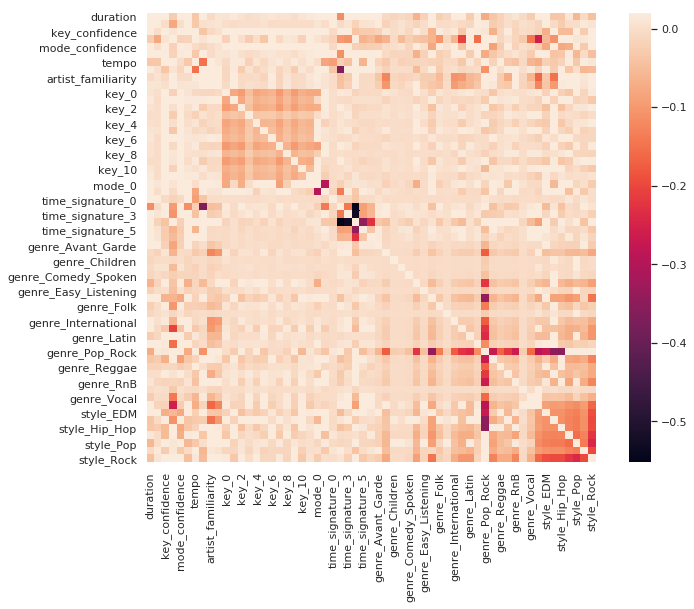

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Make the figure bigger
sns.heatmap(train_test_data_onehot.corr(), vmax=.02, square=True)

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=0).fit(train_test_data_onehot.drop(columns=['track_id']))

In [29]:
kmeans_genre = kmeans.predict(train_test_data_onehot.drop(columns=['track_id']))

In [30]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(train_test_data_onehot.drop(columns=['track_id'])[:20000])


In [31]:
kmeans_genre20 = kmeans_genre80 = kmeans.predict(train_test_data_onehot.drop(columns=['track_id'])[20000:])

In [39]:
pd.DataFrame(kmeans_genre20).head()

,0
0,3
1,0
2,0
3,3
4,6


In [33]:
train_test_data['style']

0              Folk
1              Folk
2              Punk
3              Punk
4         Classical
5           Hip_Hop
6              Punk
7              Folk
8              Punk
9              Rock
10             Rock
11             Punk
12             Rock
13          Hip_Hop
14             Rock
15             Rock
16              Pop
17          Hip_Hop
18              Pop
19             Folk
20              Pop
21            Metal
22              EDM
23              Pop
24             Rock
25          Hip_Hop
26             Folk
27          Hip_Hop
28             Rock
29             Rock
            ...    
273904      Hip_Hop
273905         Rock
273906    Classical
273907         Rock
273908         Rock
273909         Folk
273910          Pop
273911    Classical
273912      Hip_Hop
273913         Rock
273914        Metal
273915        Metal
273916         Rock
273917         Punk
273918          Pop
273919          Pop
273920         Rock
273921      Hip_Hop
273922        Metal


### Resupervised learning

In [34]:
train_test_data_dum = pd.get_dummies(train_test_data, columns=['genre']).reset_index(drop=True)
X_train_new = train_test_data_dum.drop(columns = ['track_id','style','key_confidence','mode_confidence','time_signature_confidence'])[:20000]
y_train_new = train_test_data_dum['style'][:20000]
X_test_new = train_test_data_dum.drop(columns = ['track_id','style','key_confidence','mode_confidence','time_signature_confidence'])[20000:]
y_test_new = train_test_data_dum['style'][20000:]

In [35]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train_new, y_train_new)
pred = forest.predict(X_test_new)
accuracy_score(y_test_new, pred)

0.5909685193790513

## Next day

### Let's look at the features to see if we can do any better feature engineering, then let's tune some models

In [37]:
train_test_data_dum.head()

,track_id,duration,end_of_fade_in,key_confidence,loudness,mode_confidence,start_of_fade_out,tempo,time_signature_confidence,artist_familiarity,artist_hotttnesss,style,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,time_signature_7,genre_Avant_Garde,genre_Blues,genre_Children,genre_Classical,genre_Comedy_Spoken,genre_Country,genre_Easy_Listening,genre_Electronic,genre_Folk,genre_Holiday,genre_International,genre_Jazz,genre_Latin,genre_New Age,genre_Pop_Rock,genre_Rap,genre_Reggae,genre_Religious,genre_RnB,genre_Stage,genre_Vocal
0,TRDJCZP12903CE7498,268.38159,0.000,0.625,-8.629,0.559,257.231,82.811,0.561,0.882112,0.670106,Folk,0.000,0.625,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.017426,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TRDJCUX128F425F866,236.14649,0.257,0.425,-14.287,0.469,212.764,139.583,0.228,0.492370,0.338942,Folk,0.000,0.000,0.000,0.0,0.0,0.425,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000066,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,TRDJCCR12903CAFA73,1517.60934,13.857,0.129,-17.578,0.228,1504.496,119.700,1.000,0.489777,0.346571,Punk,0.129,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.228,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,TRDJCNE128F428BE28,171.15383,0.229,0.632,-7.108,0.517,164.577,202.356,0.413,0.527130,0.344246,Punk,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.632,0.0,0.0,0.0,0.0,0.517,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,TRDJCET128F9312133,222.85016,0.409,0.838,-19.036,0.620,215.673,89.553,0.555,0.449659,0.244326,Classical,0.000,0.000,0.838,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.018120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [42]:
train_test_data_dum_k = train_test_data_dum
train_test_data_dum_k['new_genre'] = pd.DataFrame(kmeans_genre)

In [46]:
train_test_data_dum_k2 = pd.get_dummies(train_test_data_dum_k, columns=['style']).reset_index(drop=True)
X_train_new2 = train_test_data_dum_k2.drop(columns = ['track_id','new_genre','key_confidence','mode_confidence','time_signature_confidence'])[:20000]
y_train_new2 = train_test_data_dum_k2['new_genre'][:20000]
X_test_new2 = train_test_data_dum_k2.drop(columns = ['track_id','new_genre','key_confidence','mode_confidence','time_signature_confidence'])[20000:]
y_test_new2 = train_test_data_dum_k2['new_genre'][20000:]

In [47]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train_new2, y_train_new2)
pred = forest.predict(X_test_new2)
accuracy_score(y_test_new2, pred)

0.9874022383769011

#### cluster and then make a feature

In [52]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(train_test_data.drop(columns=['track_id','genre','style'])[:20000])
kmeans_genre20 = kmeans.predict(train_test_data.drop(columns=['track_id','genre','style'])[20000:])
kmeans = KMeans(n_clusters=8, random_state=0).fit(train_test_data.drop(columns=['track_id','genre','style'])[20000:])
kmeans_genre80 = kmeans.predict(train_test_data.drop(columns=['track_id','genre','style'])[:20000])

In [54]:
train_test_data.shape

(273934, 33)

In [64]:
split_data1 = train_test_data.drop(columns=['track_id','genre','style'])[:54786]
split_data2 = train_test_data.drop(columns=['track_id','genre','style'])[54786:109572]
split_data3 = train_test_data.drop(columns=['track_id','genre','style'])[109572:164358]
split_data4 = train_test_data.drop(columns=['track_id','genre','style'])[164358:219144]
split_data5 = train_test_data.drop(columns=['track_id','genre','style'])[219144:]

In [66]:
split_data1.shape

(54786, 30)

In [101]:
clusters = 5

In [102]:
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(pd.concat([split_data2,split_data3,split_data4,split_data5]))
kmeans_pred1 = kmeans.predict(split_data1)

kmeans = KMeans(n_clusters=clusters, random_state=0).fit(pd.concat([split_data1,split_data3,split_data4,split_data5]))
kmeans_pred2 = kmeans.predict(split_data2)

kmeans = KMeans(n_clusters=clusters, random_state=0).fit(pd.concat([split_data1,split_data2,split_data4,split_data5]))
kmeans_pred3 = kmeans.predict(split_data3)

kmeans = KMeans(n_clusters=clusters, random_state=0).fit(pd.concat([split_data1,split_data2,split_data3,split_data5]))
kmeans_pred4 = kmeans.predict(split_data4)

kmeans = KMeans(n_clusters=clusters, random_state=0).fit(pd.concat([split_data1,split_data2,split_data3,split_data4]))
kmeans_pred5 = kmeans.predict(split_data5)

In [103]:
type(kmeans_pred5)

numpy.ndarray

In [104]:
np.concatenate((kmeans_pred1, kmeans_pred2))

array([3, 3, 2, ..., 1, 4, 1], dtype=int32)

In [105]:
kmeans_cv = np.concatenate((kmeans_pred1, kmeans_pred2, kmeans_pred3, kmeans_pred4, kmeans_pred5))

In [106]:
kmeans_cv.shape

(273934,)

In [107]:
train_test_data_dum_k3 = train_test_data.drop(columns=['genre','style']).reset_index(drop=True)
train_test_data_dum_k3['new_genre'] = pd.DataFrame(kmeans_cv)
X_train_new2 = train_test_data_dum_k3.drop(columns = ['track_id','new_genre','key_confidence','mode_confidence','time_signature_confidence'])[:20000]
y_train_new2 = train_test_data_dum_k3['new_genre'][:20000]
X_test_new2 = train_test_data_dum_k3.drop(columns = ['track_id','new_genre','key_confidence','mode_confidence','time_signature_confidence'])[20000:]
y_test_new2 = train_test_data_dum_k3['new_genre'][20000:]

In [108]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train_new2, y_train_new2)
pred = forest.predict(X_test_new2)
accuracy_score(y_test_new2, pred)

0.41495427945844193

### Mean-shift clustering is better than KNN for this problem

In [148]:
train_test_data_dum_k2.to_csv('one-hot-encoded-everything.csv',index=False)

In [2]:
train_test_data_dum_k2 = pd.read_csv('one-hot-encoded-everything.csv')

In [3]:
train_test_data_dum_k2.head()

,track_id,duration,end_of_fade_in,key_confidence,loudness,mode_confidence,start_of_fade_out,tempo,time_signature_confidence,artist_familiarity,artist_hotttnesss,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,time_signature_7,genre_Avant_Garde,genre_Blues,genre_Children,genre_Classical,genre_Comedy_Spoken,genre_Country,genre_Easy_Listening,genre_Electronic,genre_Folk,genre_Holiday,genre_International,genre_Jazz,genre_Latin,genre_New Age,genre_Pop_Rock,genre_Rap,genre_Reggae,genre_Religious,genre_RnB,genre_Stage,genre_Vocal,new_genre,style_Classical,style_EDM,style_Folk,style_Hip_Hop,style_Metal,style_Pop,style_Punk,style_Rock
0,TRDJCZP12903CE7498,268.38159,0.000,0.625,-8.629,0.559,257.231,82.811,0.561,0.882112,0.670106,0.000,0.625,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.017426,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,TRDJCUX128F425F866,236.14649,0.257,0.425,-14.287,0.469,212.764,139.583,0.228,0.492370,0.338942,0.000,0.000,0.000,0.0,0.0,0.425,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000066,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,TRDJCCR12903CAFA73,1517.60934,13.857,0.129,-17.578,0.228,1504.496,119.700,1.000,0.489777,0.346571,0.129,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.228,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0
3,TRDJCNE128F428BE28,171.15383,0.229,0.632,-7.108,0.517,164.577,202.356,0.413,0.527130,0.344246,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.632,0.0,0.0,0.0,0.0,0.517,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,TRDJCET128F9312133,222.85016,0.409,0.838,-19.036,0.620,215.673,89.553,0.555,0.449659,0.244326,0.000,0.000,0.838,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.018120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [4]:
newdata_meanshift = train_test_data_dum_k2.drop(columns=['track_id'])

In [5]:
from sklearn.cluster import MeanShift

In [ ]:
meanshift = MeanShift()
meanshift.fit(newdata_meanshift)

In [ ]:
#### How to optimize the mean-shift?

### Do KNN to recommend new music based on music you like

### etc stuff

In [110]:
import xgboost as xgb

In [111]:
XGB = xgb.XGBClassifier()
XGB.fit(X_train_new2, y_train_new2)
pred = XGB.predict(X_test_new2)
accuracy_score(y_test_new2, pred)

0.415186623295817

In [116]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

params = {
    'min_child_weight': [4,5],
    'gamma': [0.3, 0.4, 0.5],
    'subsample': [0.6,0.7,0.8,0.9,1.0],
    'colsample_bytree': [0.6,0.7,0.8,0.9,1.0],
    'max_depth': [2,3,4]
}
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)


In [125]:
modelxgbr_class = xgb.XGBClassifier()
grid2 = GridSearchCV(modelxgbr_class, params,scoring='accuracy',n_jobs=4,verbose=3)
grid2.fit(X_train_new2,y_train_new2)
pred = grid2.best_estimator_.predict(X_test_new2)
accuracy_score(y_test_new2, pred)
#grid2.fit(X_train_small, y_small)

#x1, x2, y1, y2 = train_test_split(X_train_small, y_small, test_size=0.33, random_state = 666)
#grid2.fit(x1,y1)
#roc(y2, grid2.predict_proba(x2))

OSError: [Errno 12] Cannot allocate memory

In [129]:
import keras
import tensorflow

In [138]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

### Let's visualize the data some more

In [137]:
train_test_data_dum_k2.head()

,track_id,duration,end_of_fade_in,key_confidence,loudness,mode_confidence,start_of_fade_out,tempo,time_signature_confidence,artist_familiarity,artist_hotttnesss,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,time_signature_7,genre_Avant_Garde,genre_Blues,genre_Children,genre_Classical,genre_Comedy_Spoken,genre_Country,genre_Easy_Listening,genre_Electronic,genre_Folk,genre_Holiday,genre_International,genre_Jazz,genre_Latin,genre_New Age,genre_Pop_Rock,genre_Rap,genre_Reggae,genre_Religious,genre_RnB,genre_Stage,genre_Vocal,new_genre,style_Classical,style_EDM,style_Folk,style_Hip_Hop,style_Metal,style_Pop,style_Punk,style_Rock
0,TRDJCZP12903CE7498,268.38159,0.000,0.625,-8.629,0.559,257.231,82.811,0.561,0.882112,0.670106,0.000,0.625,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.017426,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,TRDJCUX128F425F866,236.14649,0.257,0.425,-14.287,0.469,212.764,139.583,0.228,0.492370,0.338942,0.000,0.000,0.000,0.0,0.0,0.425,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000066,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,TRDJCCR12903CAFA73,1517.60934,13.857,0.129,-17.578,0.228,1504.496,119.700,1.000,0.489777,0.346571,0.129,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.228,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0
3,TRDJCNE128F428BE28,171.15383,0.229,0.632,-7.108,0.517,164.577,202.356,0.413,0.527130,0.344246,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.632,0.0,0.0,0.0,0.0,0.517,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,TRDJCET128F9312133,222.85016,0.409,0.838,-19.036,0.620,215.673,89.553,0.555,0.449659,0.244326,0.000,0.000,0.838,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.018120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


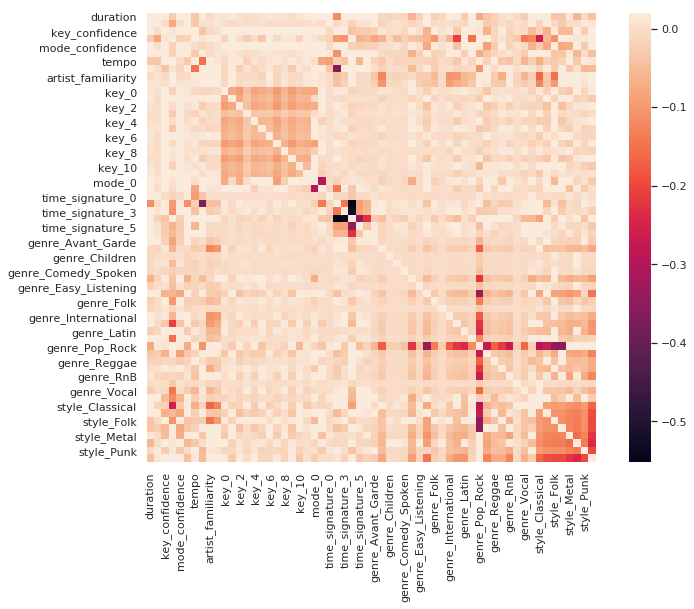

In [135]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Make the figure bigger

sns.heatmap(train_test_data_dum_k2.corr(), vmax=.02, square=True)